In [38]:
import sys
# add didgelab source code to path
sys.path.append('../../')

from cad.calc.parameters import MutationParameterSet, MutationParameter
from cad.ui.visualization import DidgeVisualizer
import numpy as np
from cad.calc.geo import Geo, geotools
import sys
import random
from cad.calc.conv import note_to_freq
import seaborn as sns

In [2]:
from cad.calc.geo import Geo


class NazareShape(MutationParameterSet):
    
    def __init__(self):
        
        MutationParameterSet.__init__(self)
        self.base_geo = [[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]
        for i in range(len(self.base_geo)-1):
            self.add_param(f"y{i+1}", 0.8, 1.2)

    def make_geo(self):
        
        geo = np.array(self.base_geo).copy()
        for i in range(len(self.base_geo)-1):
            geo[i+1][0] *= self.get_value(f"y{i+1}")

        return Geo(list(geo))
        
father = NazareShape()
#geo = father.make_geo()
#DidgeVisualizer.vis_didge(geo)


# compute 50 cadsds and get the distribution of their fundamental notes
from cad.calc.mutation import ExploringMutator
import pandas as pd
import tqdm
mutator = ExploringMutator()

mutants = []
geos = []

n=50
pbar = tqdm.tqdm(total=n)
for i in range(n):
    mutant = father.copy()
    mutator.mutate(mutant)
    mutants.append(mutant)
    geo = mutant.make_geo()
    geos.append(geo)
    geo.get_cadsd().get_notes()
    pbar.update()
    
from cad.calc.conv import note_to_freq

fD = note_to_freq(-31)

def get_closest_note(geo, f):
    notes = geo.get_cadsd().get_notes()
    freqs = np.abs(np.log2(notes.freq) - np.log2(f))
    return notes.iloc[np.argmin(freqs)]

def get_brightness(geo):
    return geo.get_cadsd().get_impedance_spektrum().query("freq>=400 and freq<=800").impedance.sum()


brightness = [get_brightness(g) for g in geos]

#fundamentals = [get_closest_note(g, fD) for g in geos]
#fundamentals = pd.DataFrame(fundamentals)
#fundamentals["note-name"].value_counts()

100%|█████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.12it/s]

,freq,impedance,rel_imp,note-number,cent-diff,note-name
1635,67.6,3.007139e+07,1.000000,-32,42.890047,C#1
132,162.0,1.040505e+07,0.346011,-17,29.811653,E2
247,277.0,4.195625e+06,0.139522,-8,1.141057,C#3
330,360.0,2.423769e+06,0.080600,-3,47.407941,F#3
434,464.0,1.206690e+06,0.040128,1,8.054462,A#4
526,556.0,2.582479e+06,0.085878,4,-5.097631,C#4
647,677.0,1.175956e+06,0.039105,7,-45.982772,E4
744,774.0,1.743176e+06,0.057968,10,22.203949,G4
888,918.0,8.298182e+05,0.027595,13,26.811244,A#5


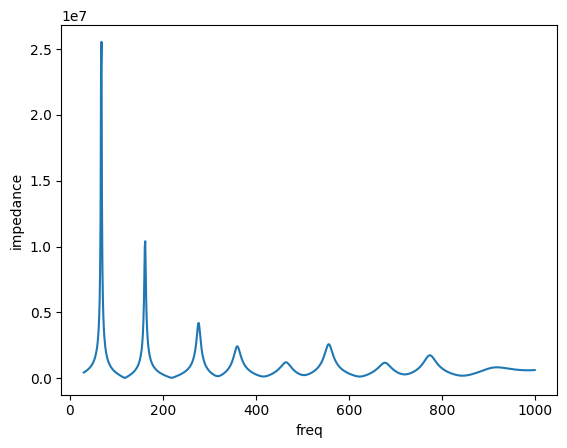

In [8]:
base_geo = [[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]
s_base = get_brightness(Geo(base_geo))
b = np.array(brightness) / s_base
ng = geos[np.argmax(b)]

cadsd = ng.get_cadsd()
impedance_spectrum=cadsd.get_impedance_spektrum()
sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")
ng.get_cadsd().get_notes()

In [ ]:
import json
geos = []
for i in range(20):
    inf = "../../../../evolutions/nazare5/results/report_1/" + str(i) + "_geo.txt"
    d = json.load(open(inf, "r"))
    geos.append(d)

<AxesSubplot: xlabel='freq', ylabel='impedance'>

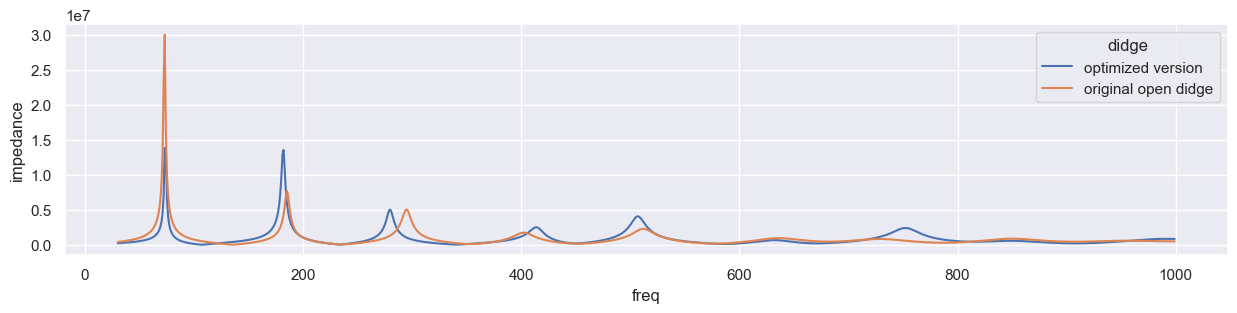

In [57]:
imp_od = geos[1]
imp_od = Geo(imp_od)
data_new = imp_od.get_cadsd().get_impedance_spektrum()
data_new["didge"] = "optimized version"

original_od = Geo([[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]).get_cadsd().get_impedance_spektrum()
original_od["didge"] = "original open didge"

data_new = pd.concat((data_new, original_od))
sns.lineplot(data=data_new, x="freq", y="impedance", hue="didge")


In [51]:
import json
geos = []
for i in range(20):
    inf = "../../../../evolutions/nazare5/results/report_1/" + str(i) + "_geo.txt"
    d = json.load(open(inf, "r"))
    geos.append(d)

In [49]:
!ls ../../../../evolutions/nazare5/results/report_1

0_geo.txt  12_geo.txt 15_geo.txt 18_geo.txt 2_geo.txt  5_geo.txt  8_geo.txt
10_geo.txt 13_geo.txt 16_geo.txt 19_geo.txt 3_geo.txt  6_geo.txt  9_geo.txt
11_geo.txt 14_geo.txt 17_geo.txt 1_geo.txt  4_geo.txt  7_geo.txt  report.pdf


In [50]:
def integral(geo, fmin, fmax):
    return geo.get_cadsd().get_impedance_spektrum().query("freq>=@fmin and freq<@fmax").impedance.sum()

base_geo = Geo([[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]])

def get_frequencies(bands, geo):
    freqs = []
    for i in range(len(bands)-1):
        f0 = bands[i]
        f1 = bands[i+1]
        freqs.append(integral(geo, f0, f1))
    return np.array(freqs)
        
bands = [i*200 for i in range(6)]

base_bands = get_frequencies(bands, base_geo)

gb = get_frequencies(bands, geos[1])
gb / base_bands
#for g in range(geos):
#    g_bands = get_frequencies(bands, g)
    

array([1.02070359, 1.02933304, 1.11166665, 1.28870455, 0.95422045])

<AxesSubplot: xlabel='freq', ylabel='impedance'>

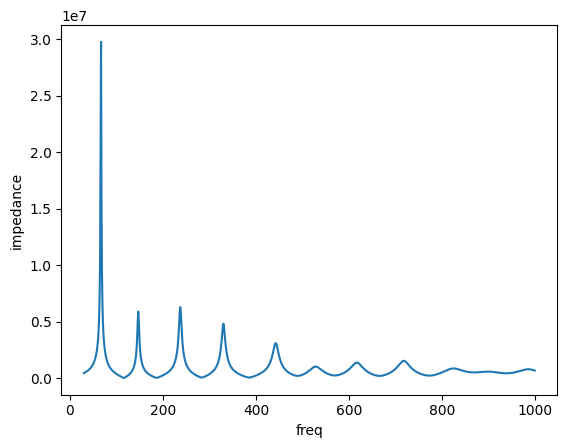

In [32]:
from cad.cadsd.cadsd import CADSD
import seaborn as sns

cadsd = CADSD(geo)
impedance_spectrum=cadsd.get_impedance_spektrum()
sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")



[(0.0, 32.0),
 (152.5, 32.01707870838886),
 (305.0, 32.17718675664816),
 (457.5, 32.69620839839289),
 (610.0, 33.838262356653296),
 (650.0, 36.911472444270274),
 (712.5, 37.70175807966319),
 (727.5, 40.209054089969605),
 (742.5, 42.48948457684535),
 (757.5, 44.338391194958206),
 (772.5, 45.670111842015345),
 (787.5, 46.34199004253792),
 (802.5, 46.279715987487805),
 (817.5, 45.51922164582249),
 (832.5, 44.16478565294017),
 (847.5, 42.37882579129496),
 (915.0, 41.432807660795895),
 (1067.5, 46.03486175156327),
 (1100.0, 49.652657500222745),
 (1220.0, 54.28156266095285),
 (1372.5, 62.19625798814248),
 (1525.0, 72.5)]

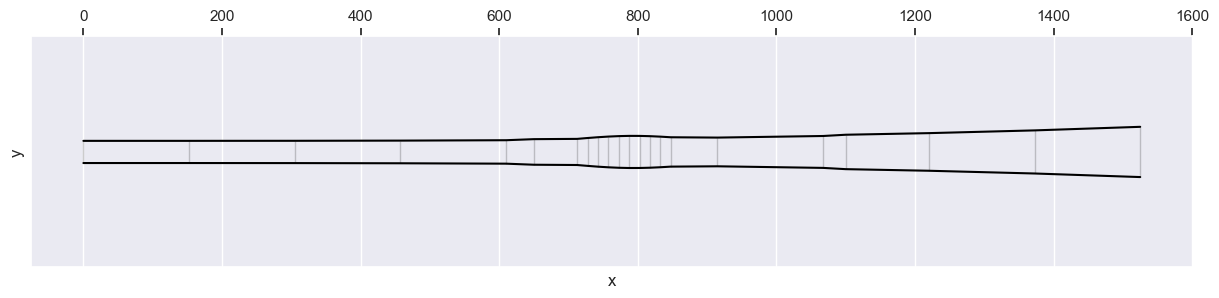

In [17]:
class SintraShape(MutationParameterSet):
    
    def __init__(self):
        
        MutationParameterSet.__init__(self)

        self.d1=32
        self.n_segments = 10
        
        self.add_param("length", 1450, 1600)
        self.add_param("bellsize", 65, 80)
        self.add_param("power", 1,2)
        
        self.add_param("widening_1_x", 500, 800)
        self.add_param("widening_1_y", 1.0, 1.3)
        self.add_param("widening_2_x", 800, 1400)
        self.add_param("widening_2_y", 1.0, 1.3)
        
        self.n_bubbles=1
        self.n_bubble_segments=10
        for i in range(self.n_bubbles):
            self.add_param(f"bubble{i}_width", 100, 200)
            self.add_param(f"bubble{i}_height", 0, 15)
            self.add_param(f"bubble{i}_pos", -0.3, 0.3)
        
    def make_geo(self):
        length = self.get_value("length")
        bellsize = self.get_value("bellsize")

        x = length*np.arange(self.n_segments+1)/self.n_segments
        y= np.arange(self.n_segments+1)/self.n_segments
        
        
        p = self.get_value("power")
        y = np.power(y, p)
        y = np.power(y, p)
        y = np.power(y, p)
        y = self.d1 + y*(bellsize - self.d1)
        
        widenings = [[self.get_value(f"widening_{i}_x"), self.get_value(f"widening_{i}_y")] for i in range(1,3)]
        for w in widenings:
            geo = list(zip(x,y))
            d=geotools.diameter_at_x(Geo(geo), w[0])
            
            add_d = w[1]*d - d
            for i in range(len(geo)):
                if geo[i][0] >= w[0]:
                    break
            
            x = np.concatenate((x[0:i], [w[0]], x[i:]))
            y_right = np.concatenate(([d], y[i:])) + add_d
            y = np.concatenate((y[0:i], y_right))
        
            y[i:] /= y[-1]/bellsize
            
        shape = list(zip(x,y))
        
        bubble_length = length-100

        for i in range(self.n_bubbles):
            
            width = self.get_value(f"bubble{i}_width")
            height = self.get_value(f"bubble{i}_height")
            pos = self.get_value(f"bubble{i}_pos")
                
            x = width * np.arange(self.n_bubble_segments)/self.n_bubble_segments
            y = height * np.sin(np.arange(self.n_bubble_segments)*np.pi/self.n_bubble_segments)
            
            x += bubble_length * i/self.n_bubbles
            x += (0.5+pos)*bubble_length/self.n_bubbles
                        
            if x[0] < 0:
                x += -1*x[0]
                x += 1
            if x[-1] > bubble_length:
                x -= x[-1] - (bubble_length)
            
            geo = Geo(shape)
            y += np.array([geotools.diameter_at_x(geo, _x) for _x in x])
            
            shape = list(filter(lambda a : a[0]<x[0] or a[0]>x[-1], shape))
            shape.extend(zip(x,y))
            shape = sorted(shape, key=lambda x : x[0])
        
        return Geo(shape)
    
parameters = SintraShape()
geo = parameters.make_geo()
DidgeVisualizer.vis_didge(geo)
geo.geo

<AxesSubplot: xlabel='freq', ylabel='impedance'>

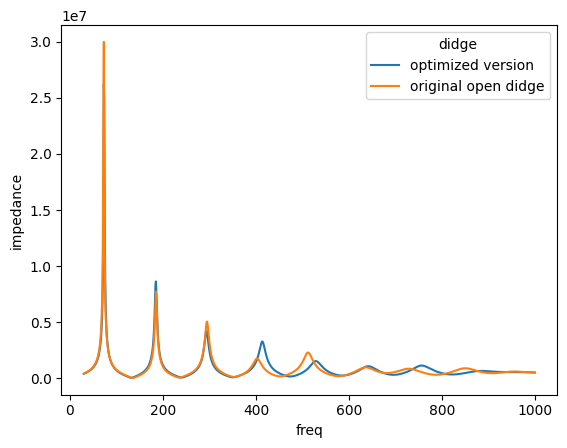

In [13]:
import pickle
import pandas as pd

p = pickle.load(open("../../../../evolutions/nazare1/results/1.pkl", "rb"))
geo = p.get(0).geo

data_new = geo.get_cadsd().get_impedance_spektrum()
data_new["didge"] = "optimized version"

imp_od = Geo([[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]).get_cadsd().get_impedance_spektrum()
imp_od["didge"] = "original open didge"

data_new = pd.concat((data_new, imp_od))
sns.lineplot(data=data_new, x="freq", y="impedance", hue="didge")


In [7]:
!ls ../../../../evolutions/nazare1/results/1.pkl

0.pkl         1.pkl         pipeline.json report_1
